# Select Cards

## Introduction

This notebook selects cards based on the features we have previously generated.

## Import dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Load dataset

### Events

In [2]:
cards = pd.read_csv("data/cards.csv", index_col=0)
cards

,xref_id,tag,year,plac,desc
0,@I1@,BIRT,1819,"Kensington,Palace,London,England","Victoria /Hanover/ is born in Kensington,Pala..."
1,@I2@,BIRT,1819,"Schloss Rosenau,Near Coburg,Germany",Albert Augustus Charles// is born in Schloss R...
2,@I3@,BIRT,1840,"Buckingham,Palace,London,England",Victoria Adelaide Mary// is born in Buckingham...
3,@I4@,BIRT,1841,"Buckingham,Palace,London,England","Edward_VII /Wettin/ is born in Buckingham,Pal..."
4,@I5@,BIRT,1843,"Buckingham,Palace,London,England","Alice Maud Mary// is born in Buckingham,Palace..."
...,...,...,...,...,...
196,@F647@,MARR,1850,Frederiksborg,Frederick_VII // and Louise /Rasmussen/ marr...
197,@F662@,MARR,1836,"Oldenburg,Germany",Otto_I Friedrich Ludwig/Wittelsbach/ and Amali...
198,@F663@,MARR,1832,Compiegne,Leopold_I George of_Saxe-Coburg// and Louise M...
199,@F1295@,MARR,1932,"London,England",Lennart Gustaf Nicholas// and Karin Emma Louis...


### Graph features

In [3]:
graph_features = pd.read_csv("data/graph_features.csv", index_col=0)
graph_features

,graph_0,graph_1,graph_2,graph_3
@I1@,0.577792,-0.360320,1.154970,-1.928660
@F42@,0.603071,-0.497670,0.963891,-1.813704
@F1@,0.624987,-0.633886,0.765493,-1.663857
@I2@,0.638989,-0.765938,0.561206,-1.449884
@F43@,0.635261,-0.885267,0.365468,-1.141019
...,...,...,...,...
@I3006@,-0.272970,-1.003930,-1.210368,0.002895
@I3007@,-0.330811,-0.918126,-1.364303,0.332938
@I3008@,-0.329129,-0.912464,-1.351566,0.359515
@I3009@,-0.599596,0.720528,0.369262,0.088158


### Place features

In [4]:
place_features = pd.read_csv("data/place_features.csv", index_col=0)
place_features

,place_0,place_1
"Winchester,Castle,England",0.308656,-0.056086
Klausholm,-0.147973,-0.092759
"Whippingham Ch.,Isle of Wight,England",0.189104,-0.030042
"Westminster,England",0.450915,0.023643
Bury St Edmunds,-0.122099,0.137447
...,...,...
"Cavendish Square,,London,England",0.394346,0.027711
"Tsarskoye Selo,Pushkin,,Russia",-0.156980,-0.098824
"Bolingbroke,Castle",-0.108451,-0.146432
Boulogne,-0.147973,-0.092759


## Combine features

In [5]:
original = cards.join(graph_features, on="xref_id").join(place_features, on="plac")
original

,xref_id,tag,year,plac,desc,graph_0,graph_1,graph_2,graph_3,place_0,place_1
0,@I1@,BIRT,1819,"Kensington,Palace,London,England","Victoria /Hanover/ is born in Kensington,Pala...",0.577792,-0.360320,1.154970,-1.928660,0.455719,0.053457
1,@I2@,BIRT,1819,"Schloss Rosenau,Near Coburg,Germany",Albert Augustus Charles// is born in Schloss R...,0.638989,-0.765938,0.561206,-1.449884,-0.190809,-0.195076
2,@I3@,BIRT,1840,"Buckingham,Palace,London,England",Victoria Adelaide Mary// is born in Buckingham...,0.605492,-0.981412,0.215801,-0.793981,0.462061,0.053835
3,@I4@,BIRT,1841,"Buckingham,Palace,London,England","Edward_VII /Wettin/ is born in Buckingham,Pal...",0.769172,-0.898549,0.178257,-0.690079,0.462061,0.053835
4,@I5@,BIRT,1843,"Buckingham,Palace,London,England","Alice Maud Mary// is born in Buckingham,Palace...",0.932842,-0.815760,0.140461,-0.584756,0.462061,0.053835
...,...,...,...,...,...,...,...,...,...,...,...
196,@F647@,MARR,1850,Frederiksborg,Frederick_VII // and Louise /Rasmussen/ marr...,3.089717,-0.656883,3.211780,4.879941,-0.161180,-0.115978
197,@F662@,MARR,1836,"Oldenburg,Germany",Otto_I Friedrich Ludwig/Wittelsbach/ and Amali...,-0.462374,0.719242,0.238212,0.219018,-0.206419,-0.219419
198,@F663@,MARR,1832,Compiegne,Leopold_I George of_Saxe-Coburg// and Louise M...,-0.018979,0.961639,0.138538,0.561873,-0.147973,-0.092759
199,@F1295@,MARR,1932,"London,England",Lennart Gustaf Nicholas// and Karin Emma Louis...,-0.403884,0.895443,0.414741,0.064607,0.526921,0.042956


## Clustering

In [6]:
pipeline = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=50, n_init="auto"),
)

features = ["tag", "year"]
features += [
    column for column in original.columns
    if column.startswith("graph_")
    if column.startswith("place_")
]

original["label"] = pipeline.fit_predict(pd.get_dummies(original[features]))

selected = original.groupby("label").first().sort_values("year")

with pd.option_context("max_colwidth", None):
    display(selected[["tag", "year", "desc"]])

,tag,year,desc
label,,,
19,DEAT,689,"Cedwalla // dies in Rome,,,Italy"
15,BIRT,742,"Charlemagne // is born in Aachen,West Germany"
33,DEAT,877,Charles_II the_Bald // dies in Modano
31,BIRT,1027,"William_I the_Conqueror // is born in Falaise,Normandy,France"
41,BIRT,1054,"Robert Curthose // is born in Normandy,France"
9,DEAT,1087,"William_I the_Conqueror // dies in Near Rouen,France"
28,MARR,1100,"Henry_I Beauclerc // and Matilda (Edith) of_Scotland// marry in Westminster,Abbey,London,England"
10,BIRT,1167,"John Lackland // is born in Beaumont Palace,Oxford,England"
48,MARR,1189,John Lackland // and Isabella De_Clare of_Gloucester// marry in Marlebridge


## Explore distribution of cards

### Year

NameError: name 'df' is not defined

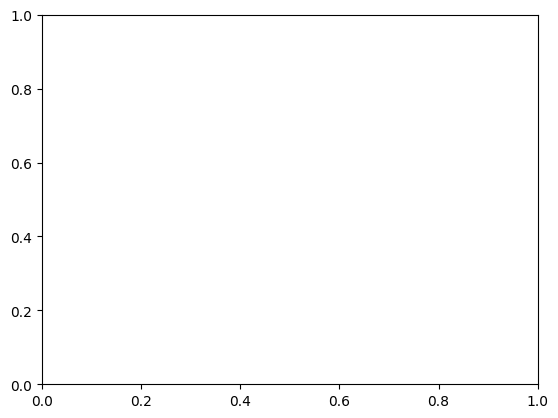

In [7]:
fig, ax = plt.subplots()

df.year.hist(ax=ax, density=True, alpha=0.5, label="original");
selected.year.hist(ax=ax, density=True, alpha=0.5, label="selected");
ax.legend();

### Graph features

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect(1)
original.plot.scatter("graph_0", "graph_1", ax=ax, color="lightgray", marker="+");
selected.plot.scatter("graph_0", "graph_1", ax=ax, color="black", marker="x");

### Place features

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect(1)
original.plot.scatter("place_0", "place_1", ax=ax, color="lightgray", marker="+");
selected.plot.scatter("place_0", "place_1", ax=ax, color="black", marker="x");